In [1]:
import torch

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [2]:
def model(t_u, w, b):
    return w * t_u + b

In [3]:
# Mean Square Loss

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [4]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [5]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [6]:
x = torch.ones(())
y = torch.ones(3, 1)
z = torch.ones(1, 3)
a = torch.ones(2, 1, 1)
print(f"shapes: x {x.shape} y: {y.shape}")
print(f"x: {z.shape}  a: {a.shape}")

shapes: x torch.Size([]) y: torch.Size([3, 1])
x: torch.Size([1, 3])  a: torch.Size([2, 1, 1])


In [7]:
x*y

tensor([[1.],
        [1.],
        [1.]])

In [8]:
y*z

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [9]:
y* z * a

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [10]:
delta = 0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [11]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [12]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [13]:
b = b - learning_rate * loss_rate_of_change_b

In [14]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [15]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [16]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        
        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
        
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        
    return params

In [17]:
training_loop(n_epochs = 100, learning_rate = 1e-4, params=torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
Epoch 3, Loss 78.929634
...
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
Epoch 11, Loss 29.104168
...
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Ep

tensor([ 0.2327, -0.0438])

In [18]:
t_un = 0.1 * t_u

In [22]:
params = training_loop(n_epochs = 5000, learning_rate = 1e-2, params=torch.tensor([1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
Epoch 3, Loss 30.871077
...
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
Epoch 11, Loss 28.941877
...
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss

Epoch 732, Loss 5.168688
Epoch 733, Loss 5.161084
Epoch 734, Loss 5.153500
Epoch 735, Loss 5.145944
Epoch 736, Loss 5.138413
Epoch 737, Loss 5.130910
Epoch 738, Loss 5.123428
Epoch 739, Loss 5.115978
Epoch 740, Loss 5.108547
Epoch 741, Loss 5.101143
Epoch 742, Loss 5.093765
Epoch 743, Loss 5.086414
Epoch 744, Loss 5.079086
Epoch 745, Loss 5.071781
Epoch 746, Loss 5.064505
Epoch 747, Loss 5.057247
Epoch 748, Loss 5.050021
Epoch 749, Loss 5.042817
Epoch 750, Loss 5.035636
Epoch 751, Loss 5.028476
Epoch 752, Loss 5.021346
Epoch 753, Loss 5.014240
Epoch 754, Loss 5.007157
Epoch 755, Loss 5.000099
Epoch 756, Loss 4.993064
Epoch 757, Loss 4.986051
Epoch 758, Loss 4.979064
Epoch 759, Loss 4.972100
Epoch 760, Loss 4.965159
Epoch 761, Loss 4.958245
Epoch 762, Loss 4.951351
Epoch 763, Loss 4.944479
Epoch 764, Loss 4.937633
Epoch 765, Loss 4.930812
Epoch 766, Loss 4.924009
Epoch 767, Loss 4.917234
Epoch 768, Loss 4.910480
Epoch 769, Loss 4.903749
Epoch 770, Loss 4.897040
Epoch 771, Loss 4.890356


Epoch 1528, Loss 3.077248
Epoch 1529, Loss 3.076739
Epoch 1530, Loss 3.076232
Epoch 1531, Loss 3.075729
Epoch 1532, Loss 3.075225
Epoch 1533, Loss 3.074724
Epoch 1534, Loss 3.074227
Epoch 1535, Loss 3.073726
Epoch 1536, Loss 3.073232
Epoch 1537, Loss 3.072739
Epoch 1538, Loss 3.072245
Epoch 1539, Loss 3.071753
Epoch 1540, Loss 3.071265
Epoch 1541, Loss 3.070778
Epoch 1542, Loss 3.070293
Epoch 1543, Loss 3.069808
Epoch 1544, Loss 3.069326
Epoch 1545, Loss 3.068845
Epoch 1546, Loss 3.068366
Epoch 1547, Loss 3.067887
Epoch 1548, Loss 3.067412
Epoch 1549, Loss 3.066937
Epoch 1550, Loss 3.066463
Epoch 1551, Loss 3.065993
Epoch 1552, Loss 3.065524
Epoch 1553, Loss 3.065055
Epoch 1554, Loss 3.064588
Epoch 1555, Loss 3.064123
Epoch 1556, Loss 3.063660
Epoch 1557, Loss 3.063199
Epoch 1558, Loss 3.062738
Epoch 1559, Loss 3.062280
Epoch 1560, Loss 3.061822
Epoch 1561, Loss 3.061367
Epoch 1562, Loss 3.060913
Epoch 1563, Loss 3.060462
Epoch 1564, Loss 3.060011
Epoch 1565, Loss 3.059561
Epoch 1566, 

Epoch 2314, Loss 2.937977
Epoch 2315, Loss 2.937943
Epoch 2316, Loss 2.937908
Epoch 2317, Loss 2.937872
Epoch 2318, Loss 2.937839
Epoch 2319, Loss 2.937804
Epoch 2320, Loss 2.937769
Epoch 2321, Loss 2.937734
Epoch 2322, Loss 2.937700
Epoch 2323, Loss 2.937665
Epoch 2324, Loss 2.937632
Epoch 2325, Loss 2.937598
Epoch 2326, Loss 2.937565
Epoch 2327, Loss 2.937531
Epoch 2328, Loss 2.937499
Epoch 2329, Loss 2.937465
Epoch 2330, Loss 2.937430
Epoch 2331, Loss 2.937398
Epoch 2332, Loss 2.937364
Epoch 2333, Loss 2.937332
Epoch 2334, Loss 2.937299
Epoch 2335, Loss 2.937265
Epoch 2336, Loss 2.937232
Epoch 2337, Loss 2.937201
Epoch 2338, Loss 2.937167
Epoch 2339, Loss 2.937134
Epoch 2340, Loss 2.937104
Epoch 2341, Loss 2.937071
Epoch 2342, Loss 2.937039
Epoch 2343, Loss 2.937008
Epoch 2344, Loss 2.936976
Epoch 2345, Loss 2.936945
Epoch 2346, Loss 2.936912
Epoch 2347, Loss 2.936883
Epoch 2348, Loss 2.936851
Epoch 2349, Loss 2.936819
Epoch 2350, Loss 2.936788
Epoch 2351, Loss 2.936757
Epoch 2352, 

Epoch 3103, Loss 2.928353
Epoch 3104, Loss 2.928349
Epoch 3105, Loss 2.928348
Epoch 3106, Loss 2.928345
Epoch 3107, Loss 2.928343
Epoch 3108, Loss 2.928340
Epoch 3109, Loss 2.928339
Epoch 3110, Loss 2.928337
Epoch 3111, Loss 2.928333
Epoch 3112, Loss 2.928332
Epoch 3113, Loss 2.928328
Epoch 3114, Loss 2.928329
Epoch 3115, Loss 2.928324
Epoch 3116, Loss 2.928323
Epoch 3117, Loss 2.928320
Epoch 3118, Loss 2.928319
Epoch 3119, Loss 2.928315
Epoch 3120, Loss 2.928313
Epoch 3121, Loss 2.928310
Epoch 3122, Loss 2.928308
Epoch 3123, Loss 2.928306
Epoch 3124, Loss 2.928304
Epoch 3125, Loss 2.928303
Epoch 3126, Loss 2.928299
Epoch 3127, Loss 2.928296
Epoch 3128, Loss 2.928295
Epoch 3129, Loss 2.928293
Epoch 3130, Loss 2.928291
Epoch 3131, Loss 2.928288
Epoch 3132, Loss 2.928287
Epoch 3133, Loss 2.928285
Epoch 3134, Loss 2.928282
Epoch 3135, Loss 2.928280
Epoch 3136, Loss 2.928276
Epoch 3137, Loss 2.928275
Epoch 3138, Loss 2.928273
Epoch 3139, Loss 2.928271
Epoch 3140, Loss 2.928268
Epoch 3141, 

Epoch 3898, Loss 2.927693
Epoch 3899, Loss 2.927694
Epoch 3900, Loss 2.927693
Epoch 3901, Loss 2.927692
Epoch 3902, Loss 2.927694
Epoch 3903, Loss 2.927692
Epoch 3904, Loss 2.927693
Epoch 3905, Loss 2.927691
Epoch 3906, Loss 2.927692
Epoch 3907, Loss 2.927692
Epoch 3908, Loss 2.927692
Epoch 3909, Loss 2.927691
Epoch 3910, Loss 2.927692
Epoch 3911, Loss 2.927690
Epoch 3912, Loss 2.927691
Epoch 3913, Loss 2.927691
Epoch 3914, Loss 2.927691
Epoch 3915, Loss 2.927690
Epoch 3916, Loss 2.927691
Epoch 3917, Loss 2.927691
Epoch 3918, Loss 2.927689
Epoch 3919, Loss 2.927690
Epoch 3920, Loss 2.927690
Epoch 3921, Loss 2.927690
Epoch 3922, Loss 2.927690
Epoch 3923, Loss 2.927689
Epoch 3924, Loss 2.927689
Epoch 3925, Loss 2.927689
Epoch 3926, Loss 2.927688
Epoch 3927, Loss 2.927689
Epoch 3928, Loss 2.927689
Epoch 3929, Loss 2.927688
Epoch 3930, Loss 2.927688
Epoch 3931, Loss 2.927688
Epoch 3932, Loss 2.927688
Epoch 3933, Loss 2.927687
Epoch 3934, Loss 2.927689
Epoch 3935, Loss 2.927688
Epoch 3936, 

Epoch 4674, Loss 2.927650
Epoch 4675, Loss 2.927650
Epoch 4676, Loss 2.927649
Epoch 4677, Loss 2.927649
Epoch 4678, Loss 2.927650
Epoch 4679, Loss 2.927650
Epoch 4680, Loss 2.927648
Epoch 4681, Loss 2.927648
Epoch 4682, Loss 2.927649
Epoch 4683, Loss 2.927649
Epoch 4684, Loss 2.927648
Epoch 4685, Loss 2.927650
Epoch 4686, Loss 2.927649
Epoch 4687, Loss 2.927651
Epoch 4688, Loss 2.927649
Epoch 4689, Loss 2.927649
Epoch 4690, Loss 2.927649
Epoch 4691, Loss 2.927650
Epoch 4692, Loss 2.927649
Epoch 4693, Loss 2.927649
Epoch 4694, Loss 2.927648
Epoch 4695, Loss 2.927650
Epoch 4696, Loss 2.927648
Epoch 4697, Loss 2.927649
Epoch 4698, Loss 2.927648
Epoch 4699, Loss 2.927650
Epoch 4700, Loss 2.927649
Epoch 4701, Loss 2.927649
Epoch 4702, Loss 2.927649
Epoch 4703, Loss 2.927649
Epoch 4704, Loss 2.927647
Epoch 4705, Loss 2.927650
Epoch 4706, Loss 2.927649
Epoch 4707, Loss 2.927649
Epoch 4708, Loss 2.927649
Epoch 4709, Loss 2.927649
Epoch 4710, Loss 2.927650
Epoch 4711, Loss 2.927650
Epoch 4712, 

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

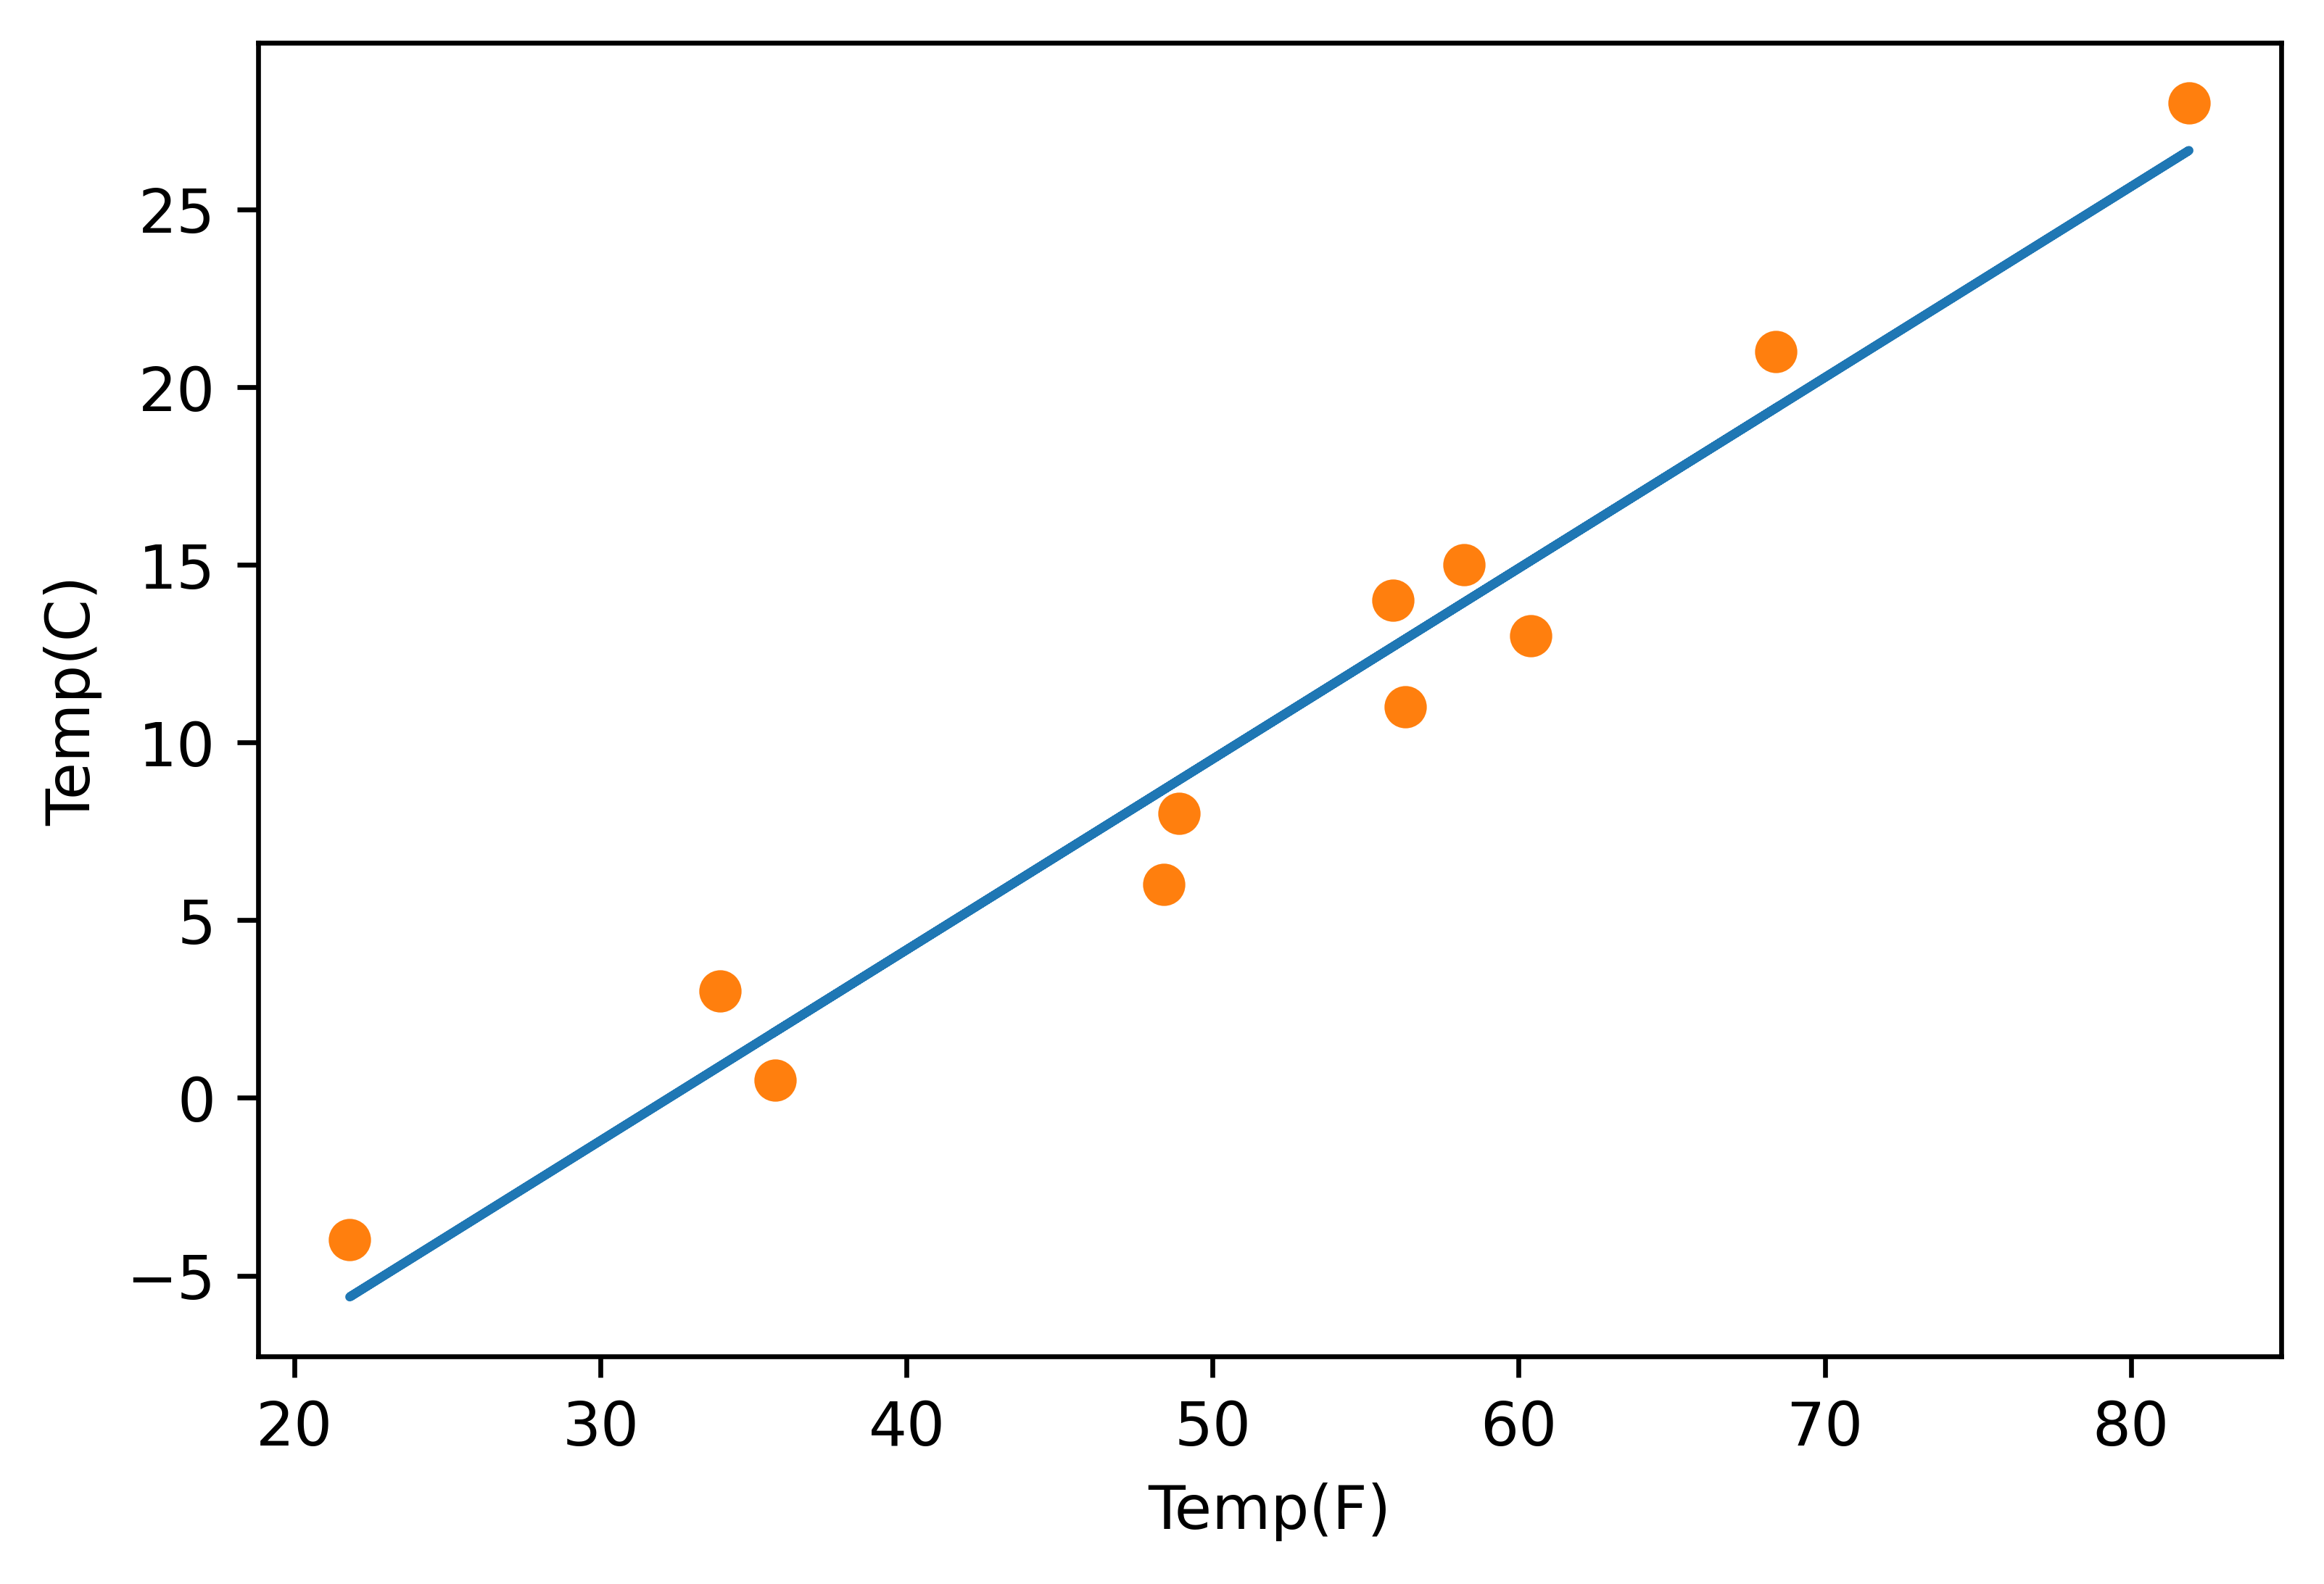

In [24]:
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temp(F)")
plt.ylabel("Temp(C)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')